In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import packages
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# load the data file
d_train = "diamonds_train.csv"
df = pd.read_csv(d_train)

In [ ]:
df.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


<Axes: >

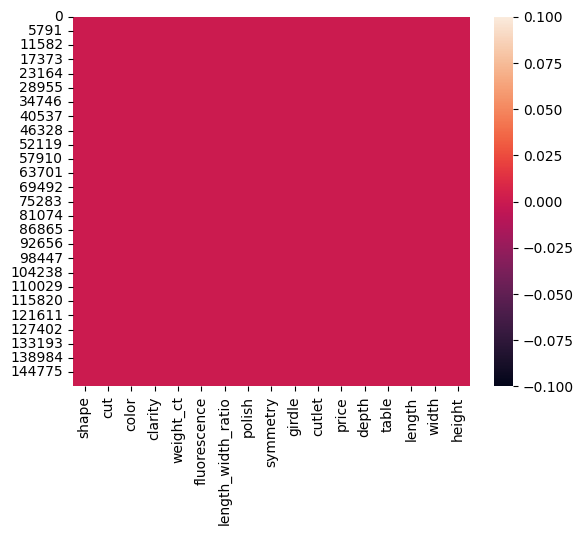

In [ ]:
# checking for missing values
sns.heatmap(df.isnull(), cbar=True)

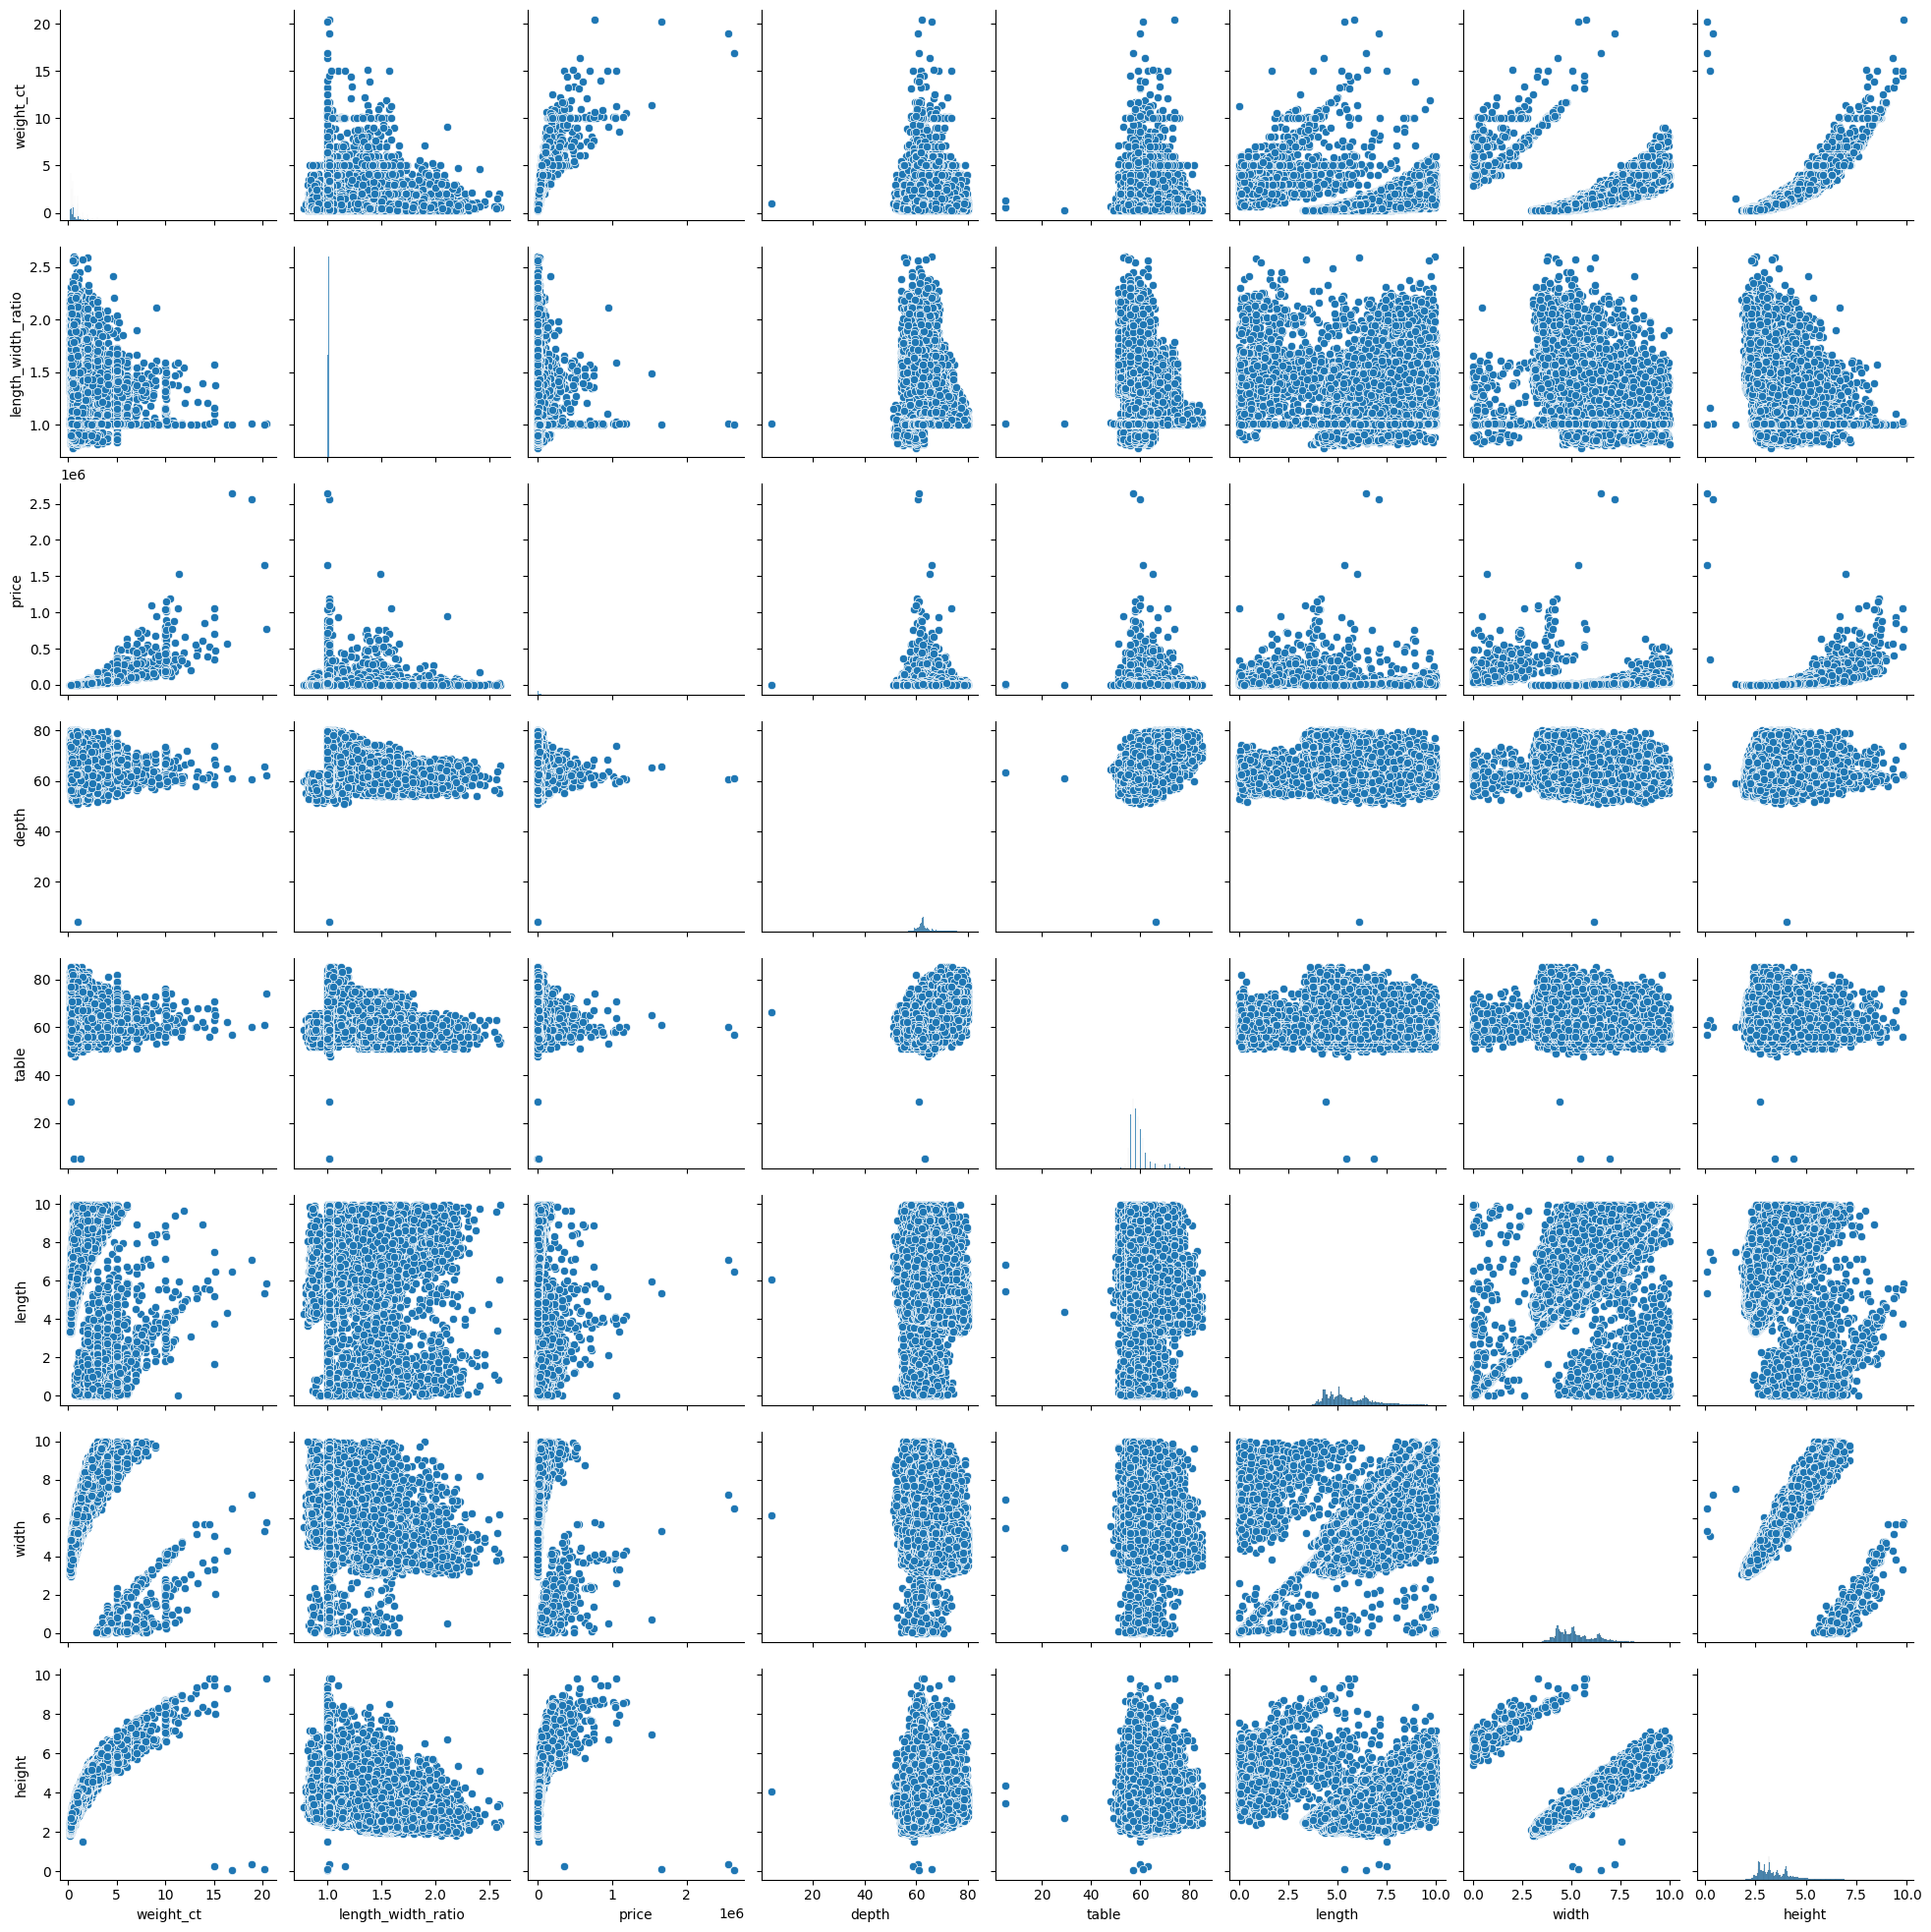

In [ ]:
sns.pairplot(df)

In [ ]:
# remove outliers
# calculate the IQR for each specified attribute
Q1 = df[['weight_ct', 'length_width_ratio', 'price', 'depth', 'table', 'length', 'width', 'height']].quantile(0.25)
Q3 = df[['weight_ct', 'length_width_ratio', 'price', 'depth', 'table', 'length', 'width', 'height']].quantile(0.75)
IQR = Q3 - Q1

# calculate the lower and upper bounds for each attribute
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# display the lower and upper bounds for each attribute
print("Lower Bounds for Each Attribute:")
print(lower_bound)

print("\nUpper Bounds for Each Attribute:")
print(upper_bound)

In [ ]:
# lower bounds
df.drop(df[df['weight_ct'] < -0.515].index, inplace=True)
df.drop(df[df['length_width_ratio'] < 0.970].index, inplace=True)

df.drop(df[df['price'] < -5689].index, inplace=True)
df.drop(df[df['depth'] < 57.450].index, inplace=True)

df.drop(df[df['table'] < 51].index, inplace=True)
df.drop(df[df['length'] < 1.940].index, inplace=True)

df.drop(df[df['width'] < 1.990].index, inplace=True)
df.drop(df[df['height'] < 1.215].index, inplace=True)

# upper bounds
df.drop(df[df['weight_ct'] > 1.925].index, inplace=True)
df.drop(df[df['length_width_ratio'] > 1.050].index, inplace=True)

df.drop(df[df['price'] > 11580].index, inplace=True)
df.drop(df[df['depth'] > 68.250].index, inplace=True)

df.drop(df[df['table'] > 67].index, inplace=True)
df.drop(df[df['length'] > 9.14].index, inplace=True)

df.drop(df[df['width'] > 8.63].index, inplace=True)
df.drop(df[df['height'] > 5.575].index, inplace=True)

In [ ]:
# Linear Regression Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

# convert categorical variables to dummy variables
categorical_features = ['cut', 'color', 'clarity']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# define features/target
X = df.drop(['price', 'shape', 'fluorescence', 'polish', 'symmetry', 'girdle', 'cutlet'], axis=1)
y = df['price']

# split dataset into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# model and predict
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
max_err = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Maximum Error: {max_err}")
print(f"R-squared (R^2): {r2}")

In [ ]:
#kNN Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

# categorical variables to dummy variables
categorical_features = ['cut', 'color', 'clarity']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df = df.drop(['shape', 'fluorescence', 'polish', 'symmetry', 'girdle', 'cutlet'], axis=1, errors='ignore')
df.dropna(subset=['price'], inplace=True)

# define features/target variable
X = df.drop('price', axis=1)
y = df['price']

# MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X)
df_scaled = pd.DataFrame(scaled_features, columns=X.columns)

df_scaled['price'] = y.values

X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('price', axis=1), df_scaled['price'], test_size=0.3, random_state=1)

# kNN regressor and training it
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# predict on test set
y_pred = knn.predict(X_test)

# optimal k
max_K = 100
avg_cross_val_scores = []

for K in range(1, max_K + 1):
    knn = KNeighborsRegressor(n_neighbors=K)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    avg_cross_val_scores.append(scores.mean())

mse_scores = [-x for x in avg_cross_val_scores]
optimal_k = mse_scores.index(min(mse_scores)) + 1
print(f'Optimal k: {optimal_k}')

# calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
max_err = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Maximum Error: {max_err}")
print(f"R-squared (R^2): {r2}")

In [ ]:
# Boosted Tree Model
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

# categorical variables to dummy variables
categorical_features = ['cut', 'color', 'clarity']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df = df.drop(['shape', 'fluorescence', 'polish', 'symmetry', 'girdle', 'cutlet'], axis=1, errors='ignore')
df.dropna(subset=['price'], inplace=True)

# define features/target variable
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('price', axis=1), df_scaled['price'], test_size=0.3, random_state=1)

# AdaBoost Regressor
bt_model = AdaBoostRegressor(n_estimators=100, random_state=1)
bt_model.fit(X_train, y_train)
y_pred = bt_model.predict(X_test)

# calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
max_err = max_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Maximum Error: {max_err}")
print(f"R-squared (R^2): {r2}")

In [ ]:
# Random Forest Model
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

# categorical variables to dummy variables
categorical_features = ['cut', 'color', 'clarity']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df = df.drop(['shape', 'fluorescence', 'polish', 'symmetry', 'girdle', 'cutlet'], axis=1, errors='ignore')
df.dropna(subset=['price'], inplace=True)

# define features/target variable
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('price', axis=1), df_scaled['price'], test_size=0.3, random_state=1)

# build model, fit the model, and predict
rf_model = RandomForestRegressor(max_depth=5, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
max_err_rf = max_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# print evaluation metrics
print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest Maximum Error: {max_err_rf}")
print(f"Random Forest R-squared (R^2): {r2_rf}")

In [ ]:
# XGBoost Model
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score

# categorical variables to dummy variables
categorical_features = ['cut', 'color', 'clarity']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df = df.drop(['shape', 'fluorescence', 'polish', 'symmetry', 'girdle', 'cutlet'], axis=1, errors='ignore')
df.dropna(subset=['price'], inplace=True)

# define features/target variable
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(df_scaled.drop('price', axis=1), df_scaled['price'], test_size=0.3, random_state=1)

# build model, fit the model, and predict
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

y_pred_xgb = xg_reg.predict(X_test)

# calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
max_err_xgb = max_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# print evaluation metrics
print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"XGBoost Maximum Error: {max_err_xgb}")
print(f"XGBoost R-squared (R^2): {r2_xgb}")